# Stack Overflow Annual Developer Survey Analysis

### 1.1 Introduction 

Stack Overflow is a popular online platform where developers and programmers can ask technical questions, share knowledge, and collaborate on coding-related problems. Launched in 2008, it has become one of the largest and most trusted communities for software development. Users can post questions, provide answers, and engage in discussions on a wide range of topics, including programming languages, algorithms, software engineering, and more. The site’s collaborative nature and vast repository of solutions make it an invaluable resource for developers of all experience levels.


### 1.2. Aims and objectives

## **Aims**
- To analyze the Stack Overflow Annual Developer Survey dataset and uncover trends, preferences, and demographic patterns across the global developer community.
- To provide valuable insights into factors such as programming languages, work environments, education, and AI perceptions.
- To visualize survey data in a meaningful way to assist in understanding global developer trends.

## **Objectives**
- Perform data cleaning and preprocessing using Python to prepare the dataset for analysis.
- Conduct exploratory data analysis (EDA) and generate insightful visualizations using tools like Matplotlib and Seaborn.
- Analyze responses to identify patterns in programming language usage, work preferences, education levels, and perceptions of AI.
- Present findings through charts and graphs to effectively communicate the results of the analysis.
- Draw actionable insights that could inform industry trends and developer practices.


## **Project Steps Summary**

1. **Data Collection**: Obtain and prepare the Stack Overflow Annual Developer Survey dataset.
2. **Data Cleaning**: Handle missing or incorrect data and ensure consistency across the dataset.
3. **Exploratory Data Analysis (EDA)**: Analyze basic statistics and identify key variables for deeper analysis.
4. **Data Visualization**: Create meaningful visualizations (e.g., charts and graphs) to represent key insights.
5. **Insight Generation**: Analyze visualized data to uncover trends in programming languages, demographics, and work preferences.
6. **Presentation**: Summarize and present findings with clear insights and visual support.
7. **Future Recommendations**: Suggest next steps for further analysis and improvements, including automation and deeper insights.




# Importing the Libraries
In this section, we will import all the necessary libraries required for our analysis and computations.


In [11]:
import pandas as pd
import numpy as np

# Data Import
In this section, we will load the dataset into our environment for analysis. 


In [14]:
path_public = r"C:\Users\user\OneDrive\Desktop\Portfolio Project\Data Analysis\survey_results_public.csv"
path_schema = r"C:\Users\user\OneDrive\Desktop\Portfolio Project\Data Analysis\survey_results_schema.csv"

In [16]:
public_data = pd.read_csv(path_public, sep=",")
schema_data = pd.read_csv(path_schema, sep=",")

In [17]:
pd.set_option("display.max_columns", None)
public_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrentlyUsing,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disag

In [18]:
schema_data.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


# Number of Respondents and Countries

- **Number of Respondents:** 65,437  
- **Number of Countries:** 185  



In [23]:
public_data["Country"].nunique()

185

In [25]:
public_data["ResponseId"].nunique()

65437

# Top 10 Countries

In this section, we will identify the top 10 countries based on the number of respondents in the dataset.


In [28]:
top_10_countries = public_data["Country"].value_counts().reset_index().head(10)
top_10_countries["Percentage"] = np.around((top_10_countries["count"] / public_data["Country"].value_counts().sum() ) * 100, 1)

top_10_countries.head()

,Country,count,Percentage
0,United States of America,11095,18.8
1,Germany,4947,8.4
2,India,4231,7.2
3,United Kingdom of Great Britain and Northern I...,3224,5.5
4,Ukraine,2672,4.5


In [30]:
def long_to_short_name(x):
  if x == "United States of America":
    return "USA"
  if x == "United Kingdom of Great Britain and Northern Ireland":
    return "UK"
  return x

top_10_countries["Country"] = top_10_countries["Country"].apply(long_to_short_name)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [34]:
sns.set_style("darkgrid")

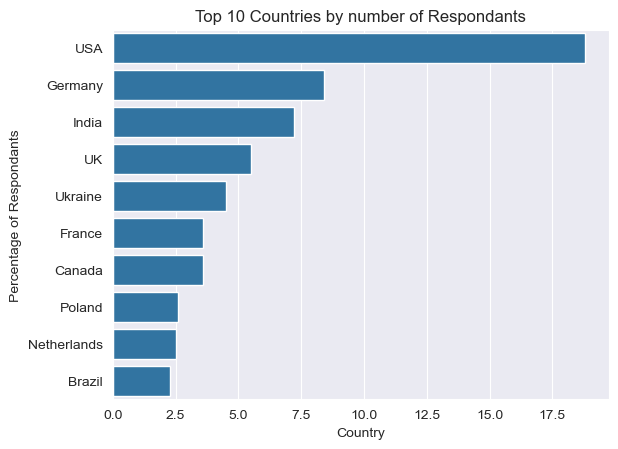

In [36]:
sns.barplot(data=top_10_countries, x="Percentage", y="Country")
plt.title("Top 10 Countries by number of Respondants")
plt.xlabel("Country")
plt.ylabel("Percentage of Respondants")
plt.show()

# Most Used Programming Languages

This section highlights the programming languages most frequently used by respondents in the dataset.


In [39]:
schema_data.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [41]:
schema_data[schema_data["question"].str.startswith("Which <b>programming")]

,qid,qname,question,force_resp,type,selector
21,QID233,Language,"Which <b>programming, scripting, and markup la...",False,Matrix,Likert


In [43]:
schema_data[schema_data["qname"] == "LanguageHaveWorkedWith"]

,qid,qname,question,force_resp,type,selector


In [45]:
ftr = "ash/Shell (all shells);Go;HTML/CSS;"
print(ftr.split(";"))

['ash/Shell (all shells)', 'Go', 'HTML/CSS', '']


In [47]:
public_data["LanguageHaveWorkedWith"]

0                                                      NaN
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4                  C++;HTML/CSS;JavaScript;Lua;Python;Rust
                               ...                        
65432                                                  NaN
65433                                                  NaN
65434                                                  NaN
65435             C;C++;Go;Lua;Objective-C;Python;Rust;SQL
65436     C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
Name: LanguageHaveWorkedWith, Length: 65437, dtype: object

In [49]:
def split_multicolumn(series):
  result_df = series.to_frame()
  options = []

  for id, value in series[series.notnull()].items():
    for option in value.split(";"):
      if not option in result_df.columns:
        options.append(option)
        result_df[option] = False
      result_df.at[id, option] = True
  return result_df[options]

In [51]:
languages_worked_with_df = split_multicolumn(public_data["LanguageHaveWorkedWith"])
languages_worked_with_df

,Bash/Shell (all shells),Go,HTML/CSS,Java,JavaScript,Python,TypeScript,C#,C,C++,PHP,PowerShell,SQL,Lua,Rust,Swift,R,Ruby,Delphi,VBA,Visual Basic (.Net),F#,Clojure,Scala,Perl,MATLAB,OCaml,Assembly,Dart,Fortran,Julia,Crystal,Kotlin,Lisp,Prolog,Haskell,Ada,Elixir,Erlang,Groovy,Zig,GDScript,MicroPython,Objective-C,Cobol,Nim,Apex,Solidity,Zephyr
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,True,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65435,False,True,False,False,False,True,False,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [52]:
languages_worked_with_df.mean()

Bash/Shell (all shells)    0.311934
Go                         0.123829
HTML/CSS                   0.486208
Java                       0.278726
JavaScript                 0.572948
Python                     0.469444
TypeScript                 0.353775
C#                         0.249370
C                          0.186194
C++                        0.211302
PHP                        0.167352
PowerShell                 0.127267
SQL                        0.468878
Lua                        0.056971
Rust                       0.115516
Swift                      0.043232
R                          0.039656
Ruby                       0.048092
Delphi                     0.016397
VBA                        0.034354
Visual Basic (.Net)        0.038189
F#                         0.007824
Clojure                    0.011263
Scala                      0.023641
Perl                       0.022648
MATLAB                     0.036340
OCaml                      0.006999
Assembly                   0

In [53]:
languages_worked_with_percentage = languages_worked_with_df.mean().sort_values(ascending=False) * 100
languages_worked_with_percentage = languages_worked_with_percentage.reset_index()

In [54]:
languages_worked_with_percentage.rename(columns={
    "index": "Programming Language",
    0: "Percentage"
}, inplace=True)

In [59]:
languages_worked_with_percentage = languages_worked_with_percentage.head(10)

In [61]:
languages_worked_with_percentage.columns

Index(['Programming Language', 'Percentage'], dtype='object')

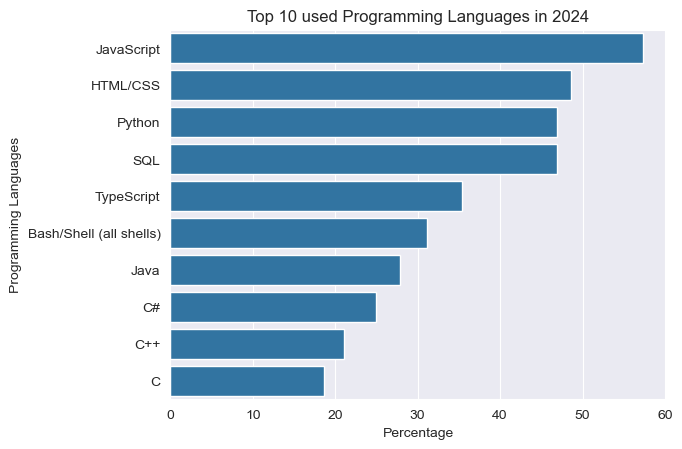

In [63]:
sns.barplot(data=languages_worked_with_percentage, x="Percentage", y="Programming Language")
plt.title("Top 10 used Programming Languages in 2024")
plt.xlabel("Percentage")
plt.ylabel("Programming Languages")
plt.show()

# Percentage of Participants by Age Category

In this section, we will calculate and visualize the percentage distribution of participants across different age categories.


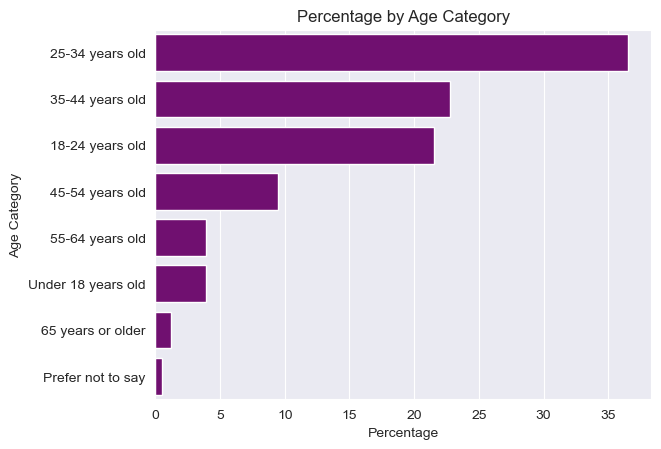

In [66]:

participants_by_age = public_data["Age"].value_counts().reset_index()


participants_by_age.columns = ["Age", "Count"]


participants_by_age["Percentage"] = np.around((participants_by_age["Count"] / participants_by_age["Count"].sum()) * 100, 1)

# Now plotting
sns.barplot(data=participants_by_age, x="Percentage", y="Age", color="purple")
plt.title("Percentage by Age Category")
plt.xlabel("Percentage")
plt.ylabel("Age Category")
plt.show()

# Percentage of Participants by Employment Type

In this section, we will calculate and visualize the percentage distribution of participants based on their employment type.


In [69]:
public_data["Employment"].value_counts()

Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full-time;Independent contract

In [71]:
employment_category_data = split_multicolumn(public_data["Employment"])

In [72]:
employment_category_percentage = employment_category_data.mean().sort_values(ascending=False) * 100
employment_category_percentage = employment_category_percentage.reset_index()
employment_category_percentage.rename(columns={
    "index": "Employment Category",
    0:"Percentage"
}, inplace=True)

In [73]:
employment_category_percentage["Percentage"] = np.around(employment_category_percentage["Percentage"], 1)

In [77]:
employment_category_percentage

,Employment Category,Percentage
0,"Employed, full-time",69.0
1,"Independent contractor, freelancer, or self-em...",16.4
2,"Student, full-time",13.2
3,"Employed, part-time",6.3
4,"Not employed, but looking for work",6.0
5,"Student, part-time",4.1
6,"Not employed, and not looking for work",1.8
7,Retired,1.0
8,I prefer not to say,0.8


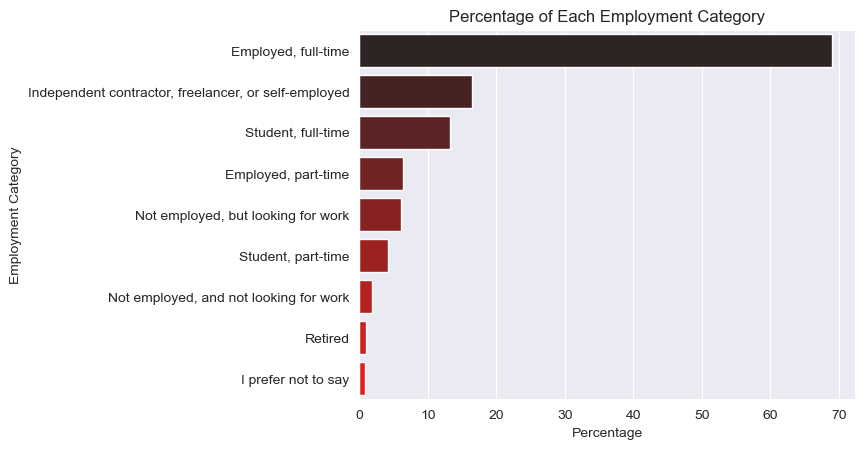

In [79]:
sns.barplot(data=employment_category_percentage, x="Percentage", y="Employment Category", hue="Employment Category", palette="dark:red", legend=False)

plt.title("Percentage of Each Employment Category")
plt.xlabel("Percentage")
plt.ylabel("Employment Category")
plt.show()

# Percentage of Participants by Job Type

In this section, we will calculate and visualize the percentage distribution of participants based on their job type.


In [82]:
public_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrentlyUsing,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disag

In [84]:
job_type_data = public_data["RemoteWork"].value_counts().reset_index()
job_type_data["Percentage"] = np.around((job_type_data["count"] / job_type_data["count"].sum() ) * 100, 1)

In [86]:
job_type_data

,RemoteWork,count,Percentage
0,"Hybrid (some remote, some in-person)",23015,42.0
1,Remote,20831,38.0
2,In-person,10960,20.0


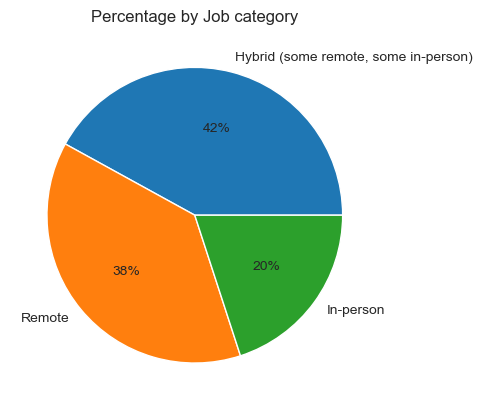

In [88]:
plt.pie(job_type_data["Percentage"], labels=job_type_data["RemoteWork"], autopct='%.0f%%')
plt.title("Percentage by Job category")
plt.show()

# Educational Level

In this section, we will explore the distribution of participants based on their highest level of education.


In [91]:
edlevel = public_data["EdLevel"].value_counts().reset_index()
edlevel["Percentage"] = np.around((edlevel["count"] / edlevel["count"].sum())*100, 1)
edlevel

,EdLevel,count,Percentage
0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24942,41.0
1,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15557,25.6
2,Some college/university study without earning ...,7651,12.6
3,"Secondary school (e.g. American high school, G...",5793,9.5
4,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2970,4.9
5,"Associate degree (A.A., A.S., etc.)",1793,2.9
6,Primary/elementary school,1146,1.9
7,Something else,932,1.5


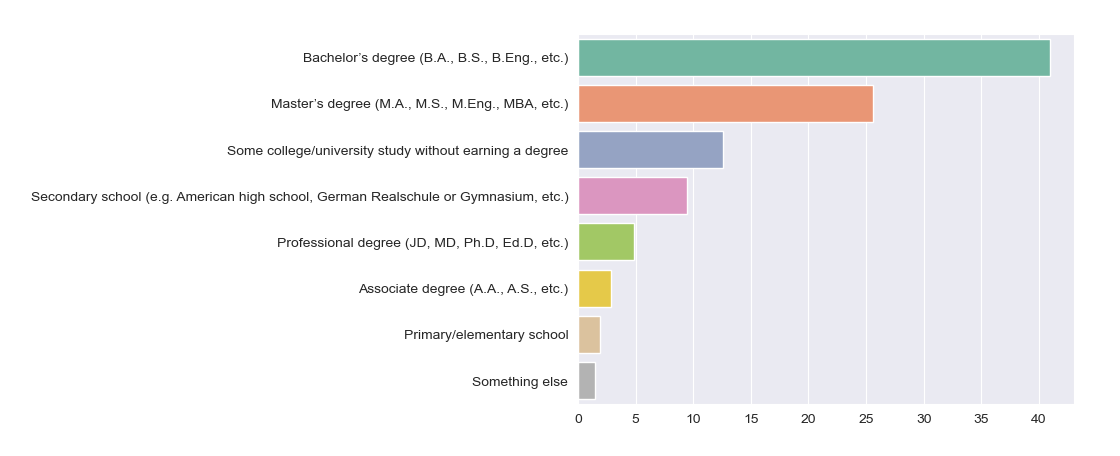

In [93]:
sns.set_style("darkgrid")

palette = sns.color_palette("Set2", n_colors=len(edlevel["EdLevel"].unique()))  

sns.barplot(data=edlevel, x="Percentage", y="EdLevel", hue="EdLevel", palette=palette, legend=False)

plt.title("Percentage of Participants by Their Educational Level", color='white', fontsize=16, fontweight='bold')
plt.xlabel("Percentage of Participants", color='white', fontsize=12)
plt.ylabel("Educational Level", color='white', fontsize=12)

plt.show()

# Percentage of Participants by Learning Method

In this section, we will calculate and visualize the percentage distribution of participants based on their preferred learning method.


In [96]:
schema_data[schema_data["question"].str.startswith("How do you learn to code? ")]

,qid,qname,question,force_resp,type,selector
7,QID276,LearnCode,How do you learn to code? Select all that apply.,False,MC,MAVR


In [97]:
public_data["LearnCode"].value_counts()

LearnCode
Other online resources (e.g., videos, blogs, forum, online community)                                                                                                 3674
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community)                                                                          2493
Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)                                                         2362
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                          2286
Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                                                 2182
                                                                                                                                       

**To Check if We Can Find the Content of the 'Other (please specify):' Cell**

In [101]:
public_data.loc[:, "LearnCode":]

,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrentlyUsing,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,37,27,Developer Experience,NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,C

**split_multicolumn**

In [104]:
learning_method = split_multicolumn(public_data["LearnCode"])

In [105]:
learning_method = learning_method.mean().reset_index()

In [106]:
learning_method

,index,0
0,Books / Physical media,0.464447
1,Colleague,0.217889
2,On the job training,0.416339
3,"Other online resources (e.g., videos, blogs, f...",0.758806
4,"School (i.e., University, College, etc)",0.454208
5,Online Courses or Certification,0.462598
6,Coding Bootcamp,0.099378
7,Friend or family member,0.097468
8,Other (please specify):,0.055550


In [107]:
learning_method.rename(columns={
    "index": "Learning Method",
    0: "count"
}, inplace=True)

In [108]:
learning_method["Percentage"] = np.around((learning_method["count"] / learning_method["count"].sum() )* 100, 1)
learning_method = learning_method.sort_values(by="Percentage", ascending=False)

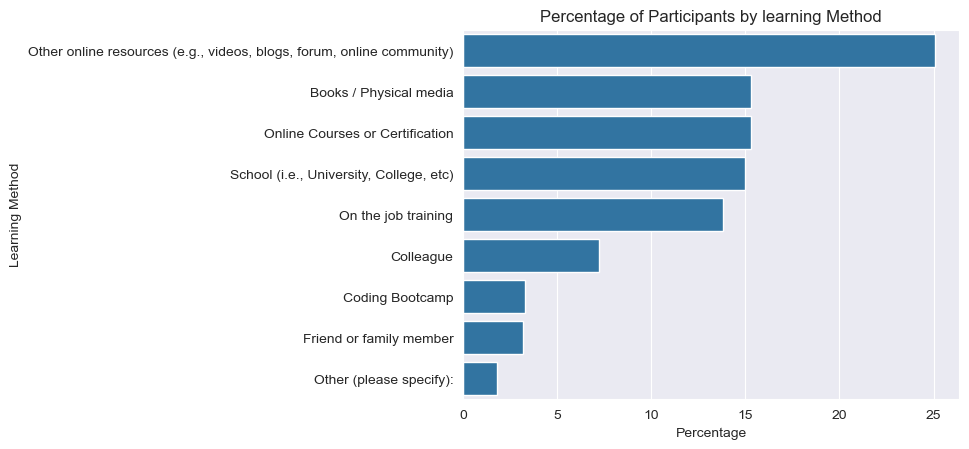

In [109]:
sns.barplot(data=learning_method, x="Percentage", y="Learning Method")
plt.title("Percentage of Participants by learning Method")
plt.xlabel("Percentage")
plt.ylabel("Learning Method")
plt.show()


# Work Environment Preferences

Understand the key factors that developers prioritize in their work environment.



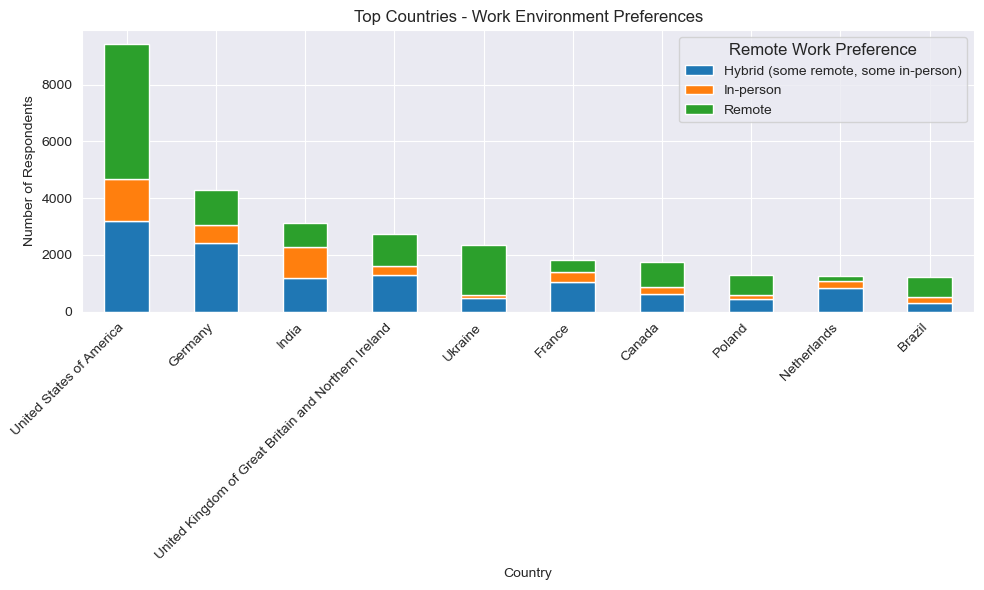

In [133]:

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(path_public, sep=",")

# Get top 10 countries by response count
top_countries = df['Country'].value_counts().head(10).index

# Filter data for top countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Group by Country and RemoteWork
work_env_country = df_top_countries.groupby(['Country', 'RemoteWork']).size().unstack()

# Sort countries by total responses
work_env_country['Total'] = work_env_country.sum(axis=1)
work_env_country = work_env_country.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Plot the preferences
ax = work_env_country.plot(
    kind='bar', stacked=True, figsize=(10, 6),
    title="Top Countries - Work Environment Preferences",
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
)

# Customize chart
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Remote Work Preference", title_fontsize=12)
plt.tight_layout()
plt.show()





# Inspecting the 'AIThreat' Column

Understand the distribution of responses in the `'AIThreat'` column to identify how participants perceive potential AI threats.


Distribution of AI Threat Perception:
AIThreat
No              30423
I'm not sure     8878
Yes              5388
Name: count, dtype: int64
Percentage of developers who don't perceive AI as a threat: 0.00%


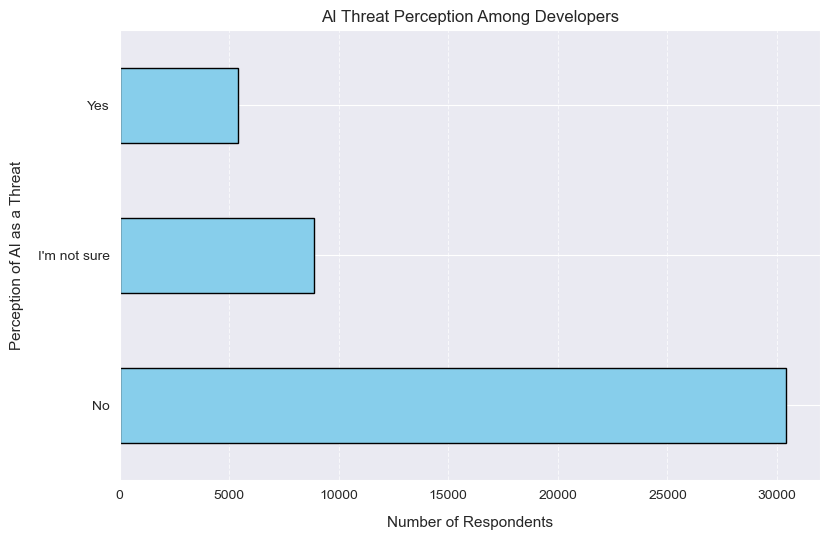

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(path_public, sep=",")

# 1. Inspect the 'AIThreat' column to see the distribution of responses
threat_perception = df['AIThreat'].value_counts()

# Print the distribution
print("Distribution of AI Threat Perception:")
print(threat_perception)

# 2. Calculate the percentage of developers who do not perceive AI as a threat
not_a_threat = df[df['AIThreat'] == 'Not a threat'].shape[0]
total_developers = df.shape[0]
percentage_not_a_threat = (not_a_threat / total_developers) * 100
print(f"Percentage of developers who don't perceive AI as a threat: {percentage_not_a_threat:.2f}%")

# Assuming 'threat_perception' is already defined
plt.figure(figsize=(10, 6))  # Smaller figure size
threat_perception.plot(kind='barh', color='skyblue', edgecolor='black', title="AI Threat Perception Among Developers")  # Use color

# Customize labels and layout
plt.xlabel("Number of Respondents", fontsize=11, labelpad=10)
plt.ylabel("Perception of AI as a Threat", fontsize=11, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add horizontal gridlines for better readability

# Adjust layout and margins for compactness
plt.tight_layout()  # Adjust layout
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.15)  # Fine-tune margins

plt.show()

# Report

In this section, we will summarize the key findings, insights, and conclusions derived from the analysis.


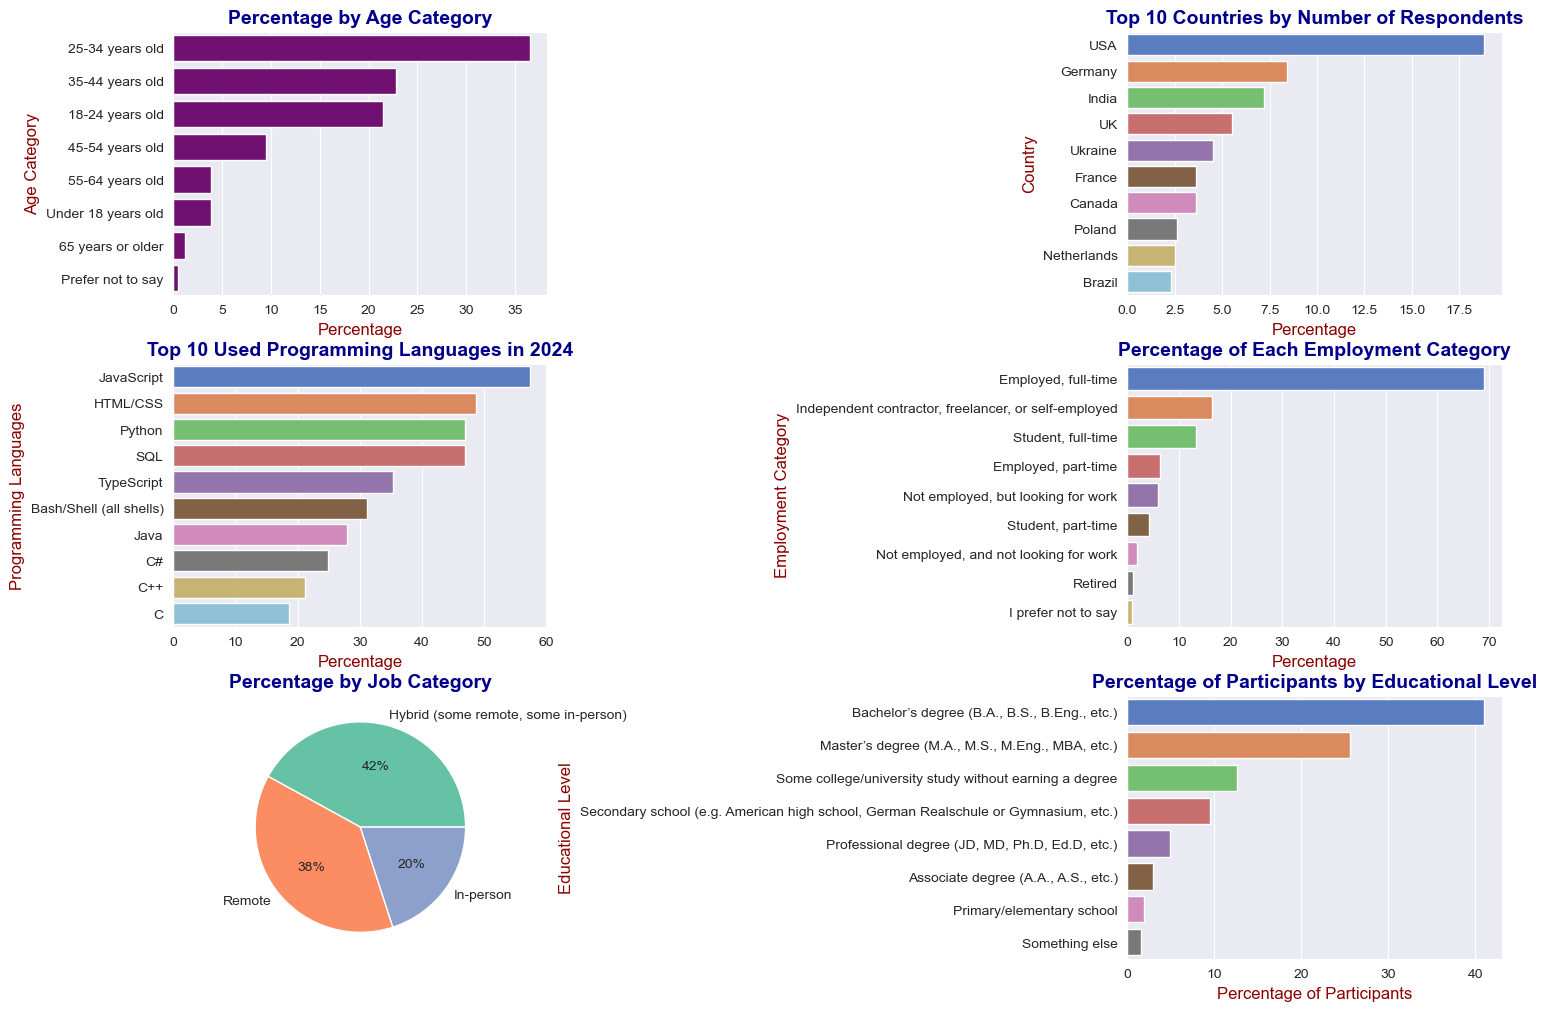

In [139]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the datasets are already loaded as DataFrames (e.g., top_10_countries, participants_by_age, etc.)

# Set up the figure for multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Set the color palette
palette = "muted"

# Plot 1: Top 10 Countries by Respondents
sns.barplot(data=top_10_countries, x="Percentage", y="Country", ax=axes[0,1], hue="Country", palette=palette)
axes[0,1].set_title("Top 10 Countries by Number of Respondents", fontsize=14, fontweight='bold', color='darkblue')
axes[0,1].set_xlabel("Percentage", fontsize=12, color='darkred')
axes[0,1].set_ylabel("Country", fontsize=12, color='darkred')

# Plot 2: Top 10 Used Programming Languages in 2024
sns.barplot(data=languages_worked_with_percentage, x="Percentage", y="Programming Language", ax=axes[1,0], hue="Programming Language", palette=palette)
axes[1,0].set_title("Top 10 Used Programming Languages in 2024", fontsize=14, fontweight='bold', color='darkblue')
axes[1,0].set_xlabel("Percentage", fontsize=12, color='darkred')
axes[1,0].set_ylabel("Programming Languages", fontsize=12, color='darkred')

# Plot 3: Percentage by Age Category
sns.barplot(data=participants_by_age, x="Percentage", y="Age", color="purple", ax=axes[0,0])
axes[0,0].set_title("Percentage by Age Category", fontsize=14, fontweight='bold', color='darkblue')
axes[0,0].set_xlabel("Percentage", fontsize=12, color='darkred')
axes[0,0].set_ylabel("Age Category", fontsize=12, color='darkred')

# Plot 4: Percentage by Employment Category
sns.barplot(data=employment_category_percentage, x="Percentage", y="Employment Category", ax=axes[1,1], hue="Employment Category", palette=palette)
axes[1,1].set_title("Percentage of Each Employment Category", fontsize=14, fontweight='bold', color='darkblue')
axes[1,1].set_xlabel("Percentage", fontsize=12, color='darkred')
axes[1,1].set_ylabel("Employment Category", fontsize=12, color='darkred')

# Plot 5: Percentage by Job Category (Pie Chart)
axes[2,0].pie(job_type_data["Percentage"], labels=job_type_data["RemoteWork"], autopct='%.0f%%', colors=sns.color_palette("Set2", len(job_type_data)))
axes[2,0].set_title("Percentage by Job Category", fontsize=14, fontweight='bold', color='darkblue')

# Plot 6: Percentage by Educational Level
sns.set_style("darkgrid")
sns.barplot(data=edlevel, x="Percentage", y="EdLevel", ax=axes[2,1], hue="EdLevel", palette=palette)
axes[2,1].set_title("Percentage of Participants by Educational Level", fontsize=14, fontweight='bold', color='darkblue')
axes[2,1].set_xlabel("Percentage of Participants", fontsize=12, color='darkred')
axes[2,1].set_ylabel("Educational Level", fontsize=12, color='darkred')

# Adjust layout for better visualization with more vertical space
plt.subplots_adjust(hspace=0.35, wspace=0.3)  # Increased hspace for vertical spacing
plt.tight_layout(pad=0.3)
plt.show()

# Save the plots as images to be embedded in the report
fig.savefig("visual_report.png", dpi=300)


## **Conclusion**

- The project analyzed the Stack Overflow Annual Developer Survey to uncover insights about the global developer community.
- Data cleaning, preprocessing, and visualization techniques were applied to identify trends in key areas:
  - Programming languages
  - Employment types
  - Education levels
  - AI perceptions
- Visualizations helped present findings in a clear and accessible way, making complex data easier to understand.
- Key insights can inform industry trends and influence future development practices.
- Further analysis, such as sentiment analysis and advanced statistical techniques, could provide deeper insights.
